## Import Modules

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd
from numpy import *

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from scipy import stats
import pandas as pd

## Load connectome data, organize matrix

In [3]:
test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_AD.mat')
AD_2009=np.array(test['connectome'])
print(AD_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_count.mat')
count_2009=np.array(test['connectome'])
print(count_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_FA.mat')
FA_2009=np.array(test['connectome'])
print(FA_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_length.mat')
length_2009=np.array(test['connectome'])
print(length_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_MD.mat')
MD_2009=np.array(test['connectome'])
print(MD_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_RD.mat')
RD_2009=np.array(test['connectome'])
print(RD_2009.shape)




test=scipy.io.loadmat('Connectome_group_aparc+aseg_AD.mat')
AD_aseg=np.array(test['connectome'])
print(AD_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_count.mat')
count_aseg=np.array(test['connectome'])
print(count_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_FA.mat')
FA_aseg=np.array(test['connectome'])
print(FA_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_length.mat')
length_aseg=np.array(test['connectome'])
print(length_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_MD.mat')
MD_aseg=np.array(test['connectome'])
print(MD_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_RD.mat')
RD_aseg=np.array(test['connectome'])
print(RD_aseg.shape)

zero_AD=np.zeros([164,164,303])
zero_count=np.zeros([164,164,303])
zero_FA=np.zeros([164,164,303])
zero_length=np.zeros([164,164,303])
zero_MD=np.zeros([164,164,303])
zero_RD=np.zeros([164,164,303])

zero_AD[40:124,40:124,:]=AD_aseg
zero_count[40:124,40:124,:]=count_aseg
zero_FA[40:124,40:124,:]=FA_aseg
zero_length[40:124,40:124,:]=length_aseg
zero_MD[40:124,40:124,:]=MD_aseg
zero_RD[40:124,40:124,:]=RD_aseg


X=np.zeros([164,164,303,12])
X[:,:,:,0]=AD_2009
X[:,:,:,1]=count_2009
X[:,:,:,2]=FA_2009
X[:,:,:,3]=length_2009
X[:,:,:,4]=MD_2009
X[:,:,:,5]=RD_2009
X[:,:,:,6]=zero_AD
X[:,:,:,7]=zero_count
X[:,:,:,8]=zero_FA
X[:,:,:,9]=zero_length
X[:,:,:,10]=zero_MD
X[:,:,:,11]=zero_RD


print(X.shape)
X=X.transpose([2,0,1,3])
print(X.shape)

(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(164, 164, 303, 12)
(303, 164, 164, 12)


## Read in data and labels, organize data for classification

In [4]:
alldata=pd.read_csv('SER_MOR_136_v2.csv',header=0)
print(alldata.shape)
alldata=np.array(alldata)
datasubjid=alldata[:,0]

list_subjs=pd.read_csv('list_subject_303_connectome.csv',header=0)
#list_subjs=list_subjs.apply(lambda x: x.str.slice(0,6))
print(list_subjs.shape)


filtindex=np.isin(list_subjs,datasubjid)
filtindex=filtindex.ravel()

X=X[filtindex]
print(X.shape)

reverseindex=np.isin(datasubjid,list_subjs)
reverseindex=reverseindex.ravel()
print(reverseindex.shape)

y=alldata[:,1]
y=np.array(y,dtype=np.float64)
y=y[reverseindex]
labelofy=alldata[:,0]
labelofy=labelofy[reverseindex]
print(y.shape)


removeblank=isnan(y)
y_connectome=y[~removeblank]
print(y.shape)

X=X[~removeblank]
print(X.shape)

newalldata=pd.read_csv('SER_MOR_136_v1.csv',header=0)
newalldata=np.array(newalldata)
newalldata=newalldata[reverseindex,:]
newalldata=newalldata[~removeblank,:]

Xvar=newalldata[:,(2,4,7,8,25,1047,1048,1049,1050,1051,1052,1053,1054)]
print(Xvar.shape)
Xvar=np.array(Xvar,dtype=np.float32)
wherenan=isnan(Xvar)
Xvar[wherenan]=0

delta_track=newalldata[:,19]-newalldata[:,7]



(136, 1055)
(303, 1)
(129, 164, 164, 12)
(136,)
(129,)
(129,)
(100, 164, 164, 12)
(100, 13)


In [5]:
fill=np.zeros([100,164,164,12])

fill[:,:,:,0]=stats.zscore(X[:,:,:,0])
fill[:,:,:,1]=stats.zscore(X[:,:,:,1])
fill[:,:,:,2]=stats.zscore(X[:,:,:,2])
fill[:,:,:,3]=stats.zscore(X[:,:,:,3])
fill[:,:,:,4]=stats.zscore(X[:,:,:,4])
fill[:,:,:,5]=stats.zscore(X[:,:,:,5])
fill[:,:,:,6]=stats.zscore(X[:,:,:,6])
fill[:,:,:,7]=stats.zscore(X[:,:,:,7])
fill[:,:,:,8]=stats.zscore(X[:,:,:,8])
fill[:,:,:,9]=stats.zscore(X[:,:,:,9])
fill[:,:,:,10]=stats.zscore(X[:,:,:,10])
fill[:,:,:,11]=stats.zscore(X[:,:,:,11])
wherenan=isnan(fill)
fill[wherenan]=0
X_connectome=fill

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


## Freesurfer data load in

In [6]:
test=scipy.io.loadmat('fs_group_aparc_all_4_measures_in_matrix.mat')
aparc_free=np.array(test['DATA'])
print(aparc_free.shape)

test=scipy.io.loadmat('fs_group_aparc2009_all_4_measures_in_matrix.mat')
aparc2009_free=np.array(test['DATA'])
print(aparc2009_free.shape)

X=np.concatenate((aparc_free,aparc2009_free),axis=3)
print(X.shape)

X=X.transpose([2,0,1,3])
print(X.shape)

(13, 13, 323, 4)
(13, 13, 323, 4)
(13, 13, 323, 8)
(323, 13, 13, 8)


In [7]:
alldata=pd.read_csv('SER_MOR_136_v2.csv',header=0)
print(alldata.shape)
alldata=np.array(alldata)
datasubjid=alldata[:,0]

list_subjs=pd.read_csv('list_fs_all_323.csv',header=0)
list_subjs=list_subjs.apply(lambda x: x.str.slice(0,6))
print(list_subjs.shape)



filtindex=np.isin(list_subjs,labelofy)
filtindex=filtindex.ravel()

X=X[filtindex]
print(X.shape)

X=X[~removeblank]
print(X.shape)


(136, 1055)
(323, 1)
(129, 13, 13, 8)
(100, 13, 13, 8)


In [8]:
fill=np.zeros([100,13,13,8])

fill[:,:,:,0]=stats.zscore(X[:,:,:,0])
fill[:,:,:,1]=stats.zscore(X[:,:,:,1])
fill[:,:,:,2]=stats.zscore(X[:,:,:,2])
fill[:,:,:,3]=stats.zscore(X[:,:,:,3])
fill[:,:,:,4]=stats.zscore(X[:,:,:,4])
fill[:,:,:,5]=stats.zscore(X[:,:,:,5])
fill[:,:,:,6]=stats.zscore(X[:,:,:,6])
fill[:,:,:,7]=stats.zscore(X[:,:,:,7])
wherenan=isnan(fill)
fill[wherenan]=0
X_freesurf=fill

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [9]:
zeropad=np.zeros([100,164,164,8])
zeropad[:,76:89,76:89,:]=X_freesurf
X_freesurf=zeropad
print(X_freesurf.shape)

(100, 164, 164, 8)


## connectome all

In [10]:
Xnew=X_connectome

Number of training points:  (90,)
Number of testing points:  (10,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 70.0%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:40 accuracy: 80.0%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epo

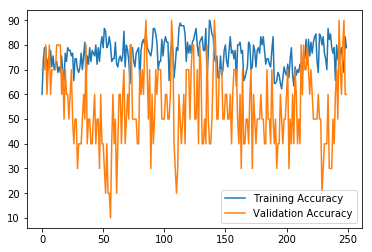

Number of training points:  (90,)
Number of testing points:  (10,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 30.0%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 40.0%
epoch 3 
Best validation accuracy! iteration:30 accuracy: 50.0%
epoch 4 
Best validation accuracy! iteration:40 accuracy: 60.0%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Best validation accuracy! iteration:500 accuracy: 70.0%
epoch 51 
epoch 52 
epoch 53 
epoch 5

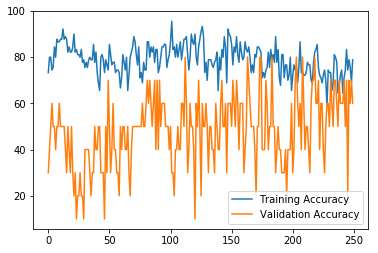

Number of training points:  (90,)
Number of testing points:  (10,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 40.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:130 accuracy: 60.0%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
Best validation accuracy! iteration:310 accuracy: 70.0%
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
Best validation accuracy! iteration:370 accuracy: 90.0%
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 


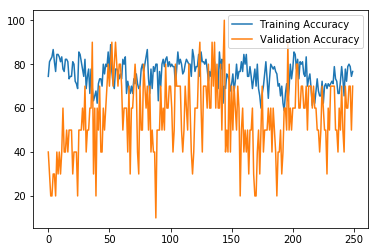

Number of training points:  (90,)
Number of testing points:  (10,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 30.0%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 40.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:110 accuracy: 60.0%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:160 accuracy: 70.0%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:210 accuracy: 80.0%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch

KeyboardInterrupt: 

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flexchannel import cnn_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=10,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]
store_proba=[]
store_predictedv=[]
store_percent=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnn_training(X_train,y_train,X_test,y_test,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=250,batch_size=9,imglen=164,channum=12)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/conall_curve_CNN.pdf')
plt.show()

scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_percentage.mat',mdict={'result':store_percent})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_truelabels.mat',mdict={'result':truelabel})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_predictedv.mat',mdict={'result':store_predictedv})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_probabilities.mat',mdict={'result':store_proba})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_sensitivity.mat',mdict={'result':result_sensitivity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_specificity.mat',mdict={'result':result_specificity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_f1s.mat',mdict={'result':result_f1s})


## morph+connectome all

In [ ]:
Xnew=np.concatenate((X_connectome,X_freesurf),axis=3)
print(Xnew.shape)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flexchannel import cnn_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=10,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]
store_proba=[]
store_predictedv=[]
store_percent=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnn_training(X_train,y_train,X_test,y_test,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=250,batch_size=9,imglen=164,channum=20)
    print(roc_pred)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/all_curve_CNN.pdf')
plt.show()

scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/all_percentage.mat',mdict={'result':store_percent})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/all_truelabels.mat',mdict={'result':truelabel})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/all_predictedv.mat',mdict={'result':store_predictedv})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/all_probabilities.mat',mdict={'result':store_proba})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/all_sensitivity.mat',mdict={'result':result_sensitivity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/all_specificity.mat',mdict={'result':result_specificity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/all_f1s.mat',mdict={'result':result_f1s})

## Morph + Connectome + clinical

In [ ]:
Xnew=np.concatenate((X_connectome,X_freesurf),axis=3)
print(Xnew.shape)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flex_merge import cnnfm_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=10,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]

result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]

store_proba=[]

store_predictedv=[]
store_percent=[]

store_demos=[]
store_deltas=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    X_trainvar,X_valvar=Xvar[train_index],Xvar[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]
    X_trainvar=X_trainvar[mask_train,:]
    _,tracking_del=delta_track[train_index],delta_track[test_index]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnnfm_training(X_train,y_train,X_trainvar,X_test,y_test,X_valvar,addedvar_num=13,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=250,batch_size=9,imglen=164,channum=20)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)
    
    store_demos.append(X_valvar)
    store_deltas.extend(tracking_del)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/conall_wclinical_curve_CNN.pdf')
plt.show()

scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_percentage.mat',mdict={'result':store_percent})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_truelabels.mat',mdict={'result':truelabel})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_predictedv.mat',mdict={'result':store_predictedv})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_probabilities.mat',mdict={'result':store_proba})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_sensitivity.mat',mdict={'result':result_sensitivity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_specificity.mat',mdict={'result':result_specificity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_f1s.mat',mdict={'result':result_f1s})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_deltas.mat',mdict={'result':store_deltas})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/conall_wclinical_demos.mat',mdict={'result':store_demos})

        